In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data  = pd.read_csv('/content/drive/MyDrive/competition_data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/competition_data/test.csv')

In [ ]:
train_data_drop = train_data.dropna()

print(train_data.isnull().sum())
print('------------------------')
print(train_data_drop.isnull().sum())

index           0
Q1             41
Q2             69
Q3             50
Q4             71
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 70, dtype: int64
------------------------
index         0
Q1            0
Q2            0
Q3            0
Q4            0
             ..
voted         0
married       0
familysize    0
ASD           0
nerdiness     0
Length: 70, dtype: int64


In [ ]:
import seaborn as sns
from IPython.display import Image

In [ ]:
# Q1~Q26 상관관계 분석
Answers = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 
           'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
           'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
           'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 
           'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']

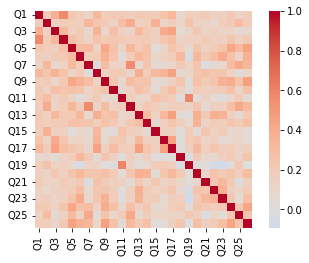

In [ ]:
correlations = train_data_drop[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [ ]:
train_data_drop['Mach_score'] = train_data_drop[Answers].mean(axis = 1)
train_data_drop.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Mach_score
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,3.653846
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.269231
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,3.692308
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,3.500000
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,3.461538


In [ ]:
print(train_data_drop['nerdiness'], train_data_drop['Mach_score'])

0        1
1        1
2        1
3        1
4        0
        ..
14995    0
14996    1
14997    1
14998    0
14999    1
Name: nerdiness, Length: 12639, dtype: int64 0        3.653846
1        3.269231
2        3.692308
3        3.500000
4        3.461538
           ...   
14995    3.346154
14996    4.038462
14997    4.615385
14998    4.115385
14999    3.423077
Name: Mach_score, Length: 12639, dtype: float64


In [ ]:
train_data_drop2 = train_data_drop

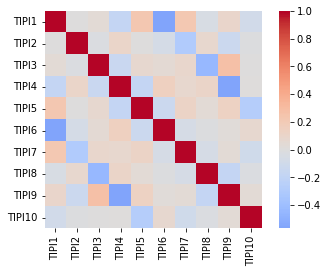

In [ ]:
# TIPI1~TIPI10 상관관계 분석
fea1 = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 
        'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

correlations = train_data_drop[fea1].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

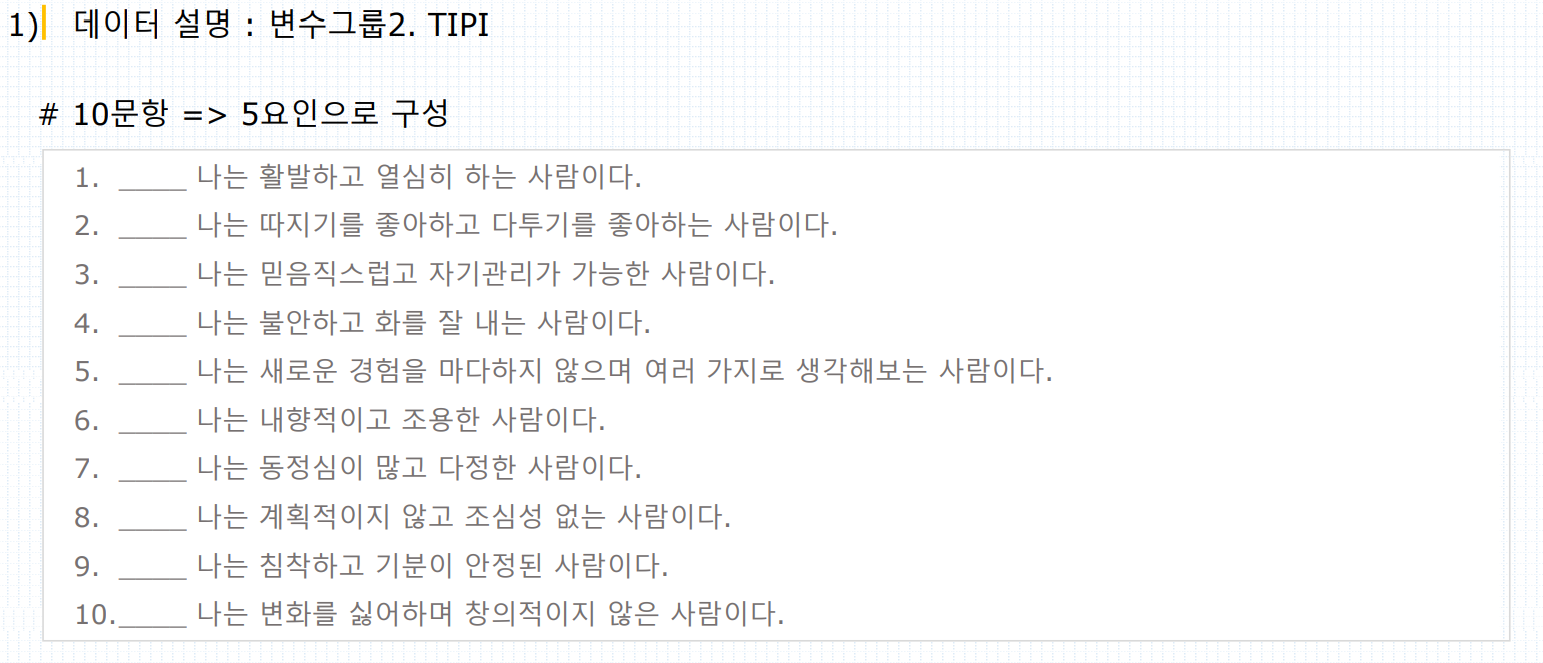

In [ ]:
# 외향성 : 1,6 , 친화성 : 2,7 , 성실성 : 3,8 , 정서적 안정성 : 4,9 , 경험 개방성 : 5,10

train_data_drop['extraversion'] = (train_data_drop['TIPI1'] + (6 - train_data_drop['TIPI6'])) / 2
train_data_drop['affinity'] = (train_data_drop['TIPI2'] + (6 - train_data_drop['TIPI7'])) / 2
train_data_drop['sincerity'] = (train_data_drop['TIPI3'] + (6 - train_data_drop['TIPI8'])) / 2
train_data_drop['stability'] = (train_data_drop['TIPI4'] + (6 - train_data_drop['TIPI9'])) / 2
train_data_drop['openness'] = (train_data_drop['TIPI5'] + (6 - train_data_drop['TIPI10'])) / 2

In [ ]:
train_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12639 entries, 0 to 14999
Data columns (total 76 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         12639 non-null  int64  
 1   Q1            12639 non-null  float64
 2   Q2            12639 non-null  float64
 3   Q3            12639 non-null  float64
 4   Q4            12639 non-null  float64
 5   Q5            12639 non-null  float64
 6   Q6            12639 non-null  float64
 7   Q7            12639 non-null  float64
 8   Q8            12639 non-null  float64
 9   Q9            12639 non-null  float64
 10  Q10           12639 non-null  float64
 11  Q11           12639 non-null  float64
 12  Q12           12639 non-null  float64
 13  Q13           12639 non-null  float64
 14  Q14           12639 non-null  float64
 15  Q15           12639 non-null  float64
 16  Q16           12639 non-null  float64
 17  Q17           12639 non-null  float64
 18  Q18           12639 non-nu

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier

In [ ]:
target_data = train_data_drop['nerdiness'].to_numpy()
target_data = target_data.reshape(-1,1)
train_data_drop = train_data_drop.drop(['country'], axis=1)

In [ ]:
print(train_data_drop.shape)
print(target_data.shape)
train_input, test_input, train_target, test_target = train_test_split(train_data_drop, target_data, test_size=0.2, random_state=42)

(12639, 75)
(12639, 1)


In [ ]:
# feature importance
rf = RandomForestClassifier(n_jobs=-1)

rf.fit(train_input, train_target)
feature_importance = rf.feature_importances_

for idx in range(train_input.shape[1]):
  print(train_input.columns[idx], ' : ', feature_importance[idx])

index  :  0.007680555063651015
Q1  :  0.014176923736234765
Q2  :  0.015140863706887211
Q3  :  0.004345353088164515
Q4  :  0.012232908726091974
Q5  :  0.004864402140110549
Q6  :  0.021983570740904276
Q7  :  0.005647617513033858
Q8  :  0.007177207509209554
Q9  :  0.0059574001164761125
Q10  :  0.0030706013563011696
Q11  :  0.00875639772325399
Q12  :  0.008915959754845885
Q13  :  0.004688455120068674
Q14  :  0.010213489264538814
Q15  :  0.013318494348675516
Q16  :  0.004368081046992438
Q17  :  0.004037053095820883
Q18  :  0.005276255802491183
Q19  :  0.005489179162302523
Q20  :  0.00662669813144607
Q21  :  0.00368277694427959
Q22  :  0.003853618325014017
Q23  :  0.005225600026632301
Q24  :  0.00563468747629517
Q25  :  0.004345277821386117
Q26  :  0.0083878574504988
introelapse  :  0.007667147315549173
testelapse  :  0.009137989379746312
surveyelapse  :  0.009224045270014409
TIPI1  :  0.0032089065827569235
TIPI2  :  0.0033880375026281665
TIPI3  :  0.003136453614768045
TIPI4  :  0.0033936414

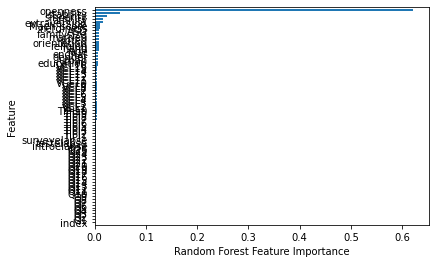

In [ ]:

# feature importance 시각화
# https://bizzengine.tistory.com/182
# https://kimdingko-world.tistory.com/95
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(train_input, train_target)

def plot_feature_importance(model):
    n_features = train_input.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), train_input.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(rf)

In [ ]:
# feature importance 바탕으로 새로운 dataset 만들기
# -> 새로 만든 데이터와 중요도 높은 데이터 바탕으로
idx27To29 = train_data_drop.iloc[:, 27:30]
idx40To55 = train_data_drop.iloc[:, 40:56]
idx56To68 = train_data_drop.iloc[:, 56:69]
idx69To74 = train_data_drop.iloc[:, 69:75]

print(idx27To29.columns)
print(idx40To55.columns)
print(idx56To68.columns)
print(idx69To74.columns)

Index(['introelapse', 'testelapse', 'surveyelapse'], dtype='object')
Index(['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16'],
      dtype='object')
Index(['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')
Index(['Mach_score', 'extraversion', 'affinity', 'sincerity', 'stability',
       'openness'],
      dtype='object')


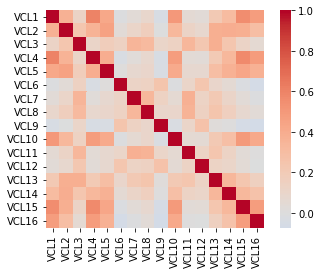

In [ ]:
# VCL1~VCL16 상관관계 분석
fea2 = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']

correlations = train_data_drop[fea2].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [ ]:
# gender, engnat, hand, voted, married, ASD (중요도 낮은 데이터들)
data = pd.concat((idx56To68, idx69To74), axis=1)
data = data.drop(['nerdiness'], axis=1)
'''data = data.drop(['gender'], axis=1)
data = data.drop(['engnat'], axis=1)
data = data.drop(['hand'], axis=1)
data = data.drop(['married'], axis=1)
data = data.drop(['ASD'], axis=1)'''
target_data = train_data_drop['nerdiness'].to_numpy()
target_data = target_data.reshape(-1, 1)

train_input, test_input, train_target, test_target = train_test_split(data, target_data, test_size=0.2, random_state=42)

In [ ]:
# model
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(n_jobs=-1, random_state=42)

# grid search한게 더 낮음
etc_model.fit(train_input, train_target)
pred = etc_model.predict(test_input)
print(etc_model.__class__.__name__," : ",accuracy_score(test_target, pred))

ExtraTreesClassifier  :  0.7863924050632911


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
rnd_model = RandomForestClassifier()

voting_model = VotingClassifier(
    estimators=[('ef',etc_model),('rf',rnd_model),('lgbm',lgbm_model)],
    voting = 'soft')

for model in (etc_model,lgbm_model,rnd_model,voting_model):
  model.fit(train_input, train_target)
  pred = model.predict(test_input)
  print(model.__class__.__name__," : ",accuracy_score(test_target,pred))

# result -> feature engineering 해도 성능 변화 크게 없음

ExtraTreesClassifier  :  0.7828322784810127
LGBMClassifier  :  0.7393196202531646
RandomForestClassifier  :  0.7832278481012658
VotingClassifier  :  0.7891613924050633
